In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Datasets/customer_purchase_data.csv')

In [5]:
data.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [7]:
data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


## Age Distribution

In [30]:
age_count=data['Age'].value_counts()
age_count.head()

Age
68    43
50    42
66    40
64    40
45    38
Name: count, dtype: int64

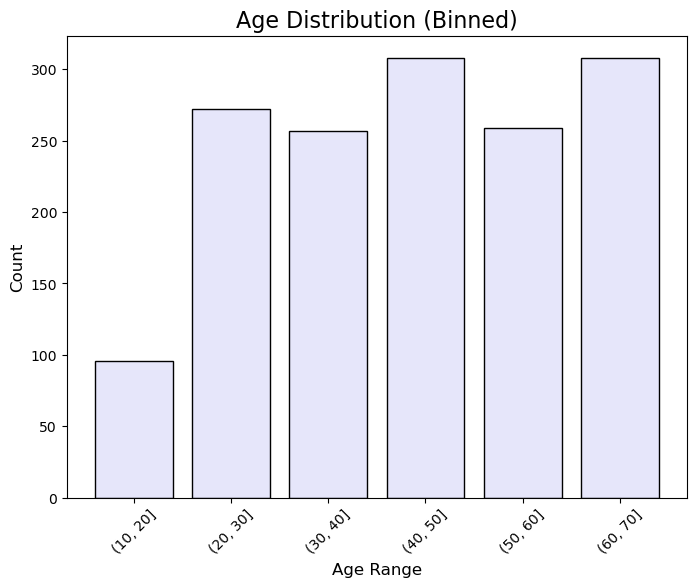

In [46]:
bins = [10, 20, 30, 40, 50, 60, 70]  
# Bin the 'Age' column into the defined bins
age_binned = pd.cut(data['Age'], bins=bins)


age_binned_count = age_binned.value_counts().sort_index()


plt.figure(figsize=(8, 6))
plt.bar(age_binned_count.index.astype(str), age_binned_count.values, color='Lavender', edgecolor='black')


plt.title('Age Distribution (Binned)', fontsize=16)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

## Distribution of Annual Income

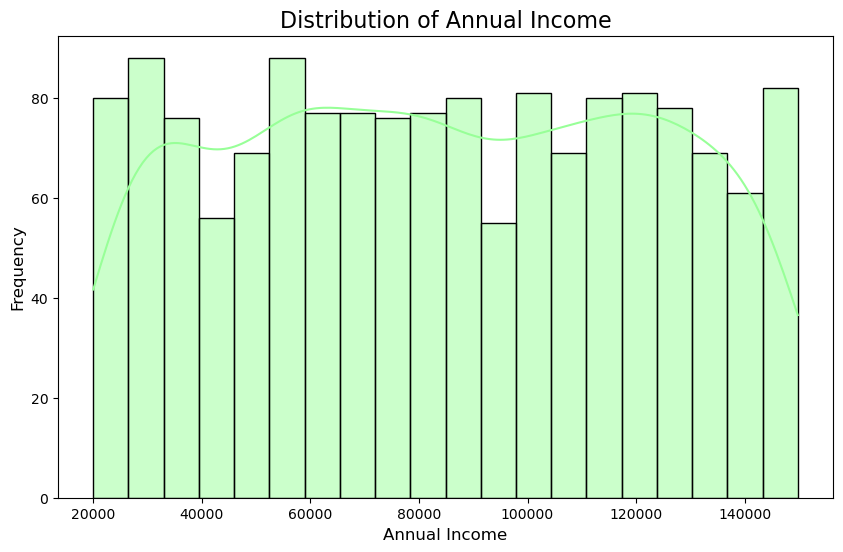

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data['AnnualIncome'], kde=True, bins=20, color='#98FF98', edgecolor='black')


plt.title('Distribution of Annual Income', fontsize=16)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.show()

## Is there a correlation between age and the number of purchases?



In [58]:
correlation = data['Age'].corr(data['NumberOfPurchases'])

# Print the correlation value
print(f"Pearson correlation between Age and Number of Purchases: {correlation:.2f}")


Pearson correlation between Age and Number of Purchases: -0.04


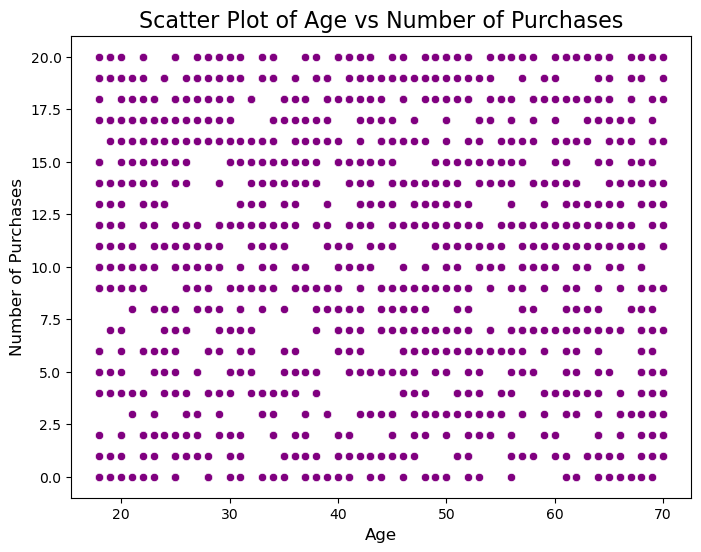

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='NumberOfPurchases', data=data, color='purple')

# Add title and labels
plt.title('Scatter Plot of Age vs Number of Purchases', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)

# Show the plot
plt.show()

## Does the time spent on the website affect the number of purchases?

In [68]:
correlation = data['TimeSpentOnWebsite'].corr(data['NumberOfPurchases'])
print("Correlation between Time Spent on Website and Number of Purchases:", correlation)

Correlation between Time Spent on Website and Number of Purchases: 0.024644293795691448


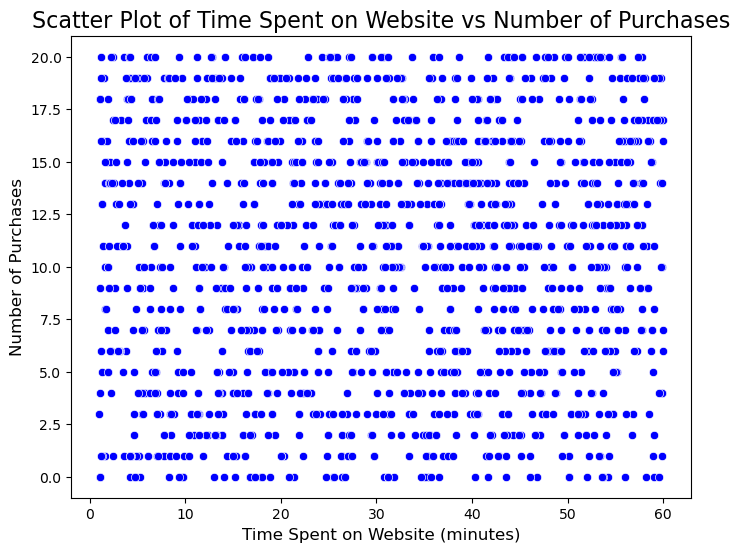

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TimeSpentOnWebsite', y='NumberOfPurchases', data=data, color='blue')


plt.title('Scatter Plot of Time Spent on Website vs Number of Purchases', fontsize=16)
plt.xlabel('Time Spent on Website (minutes)', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)


plt.show()

## Do loyalty program members purchase more frequently?

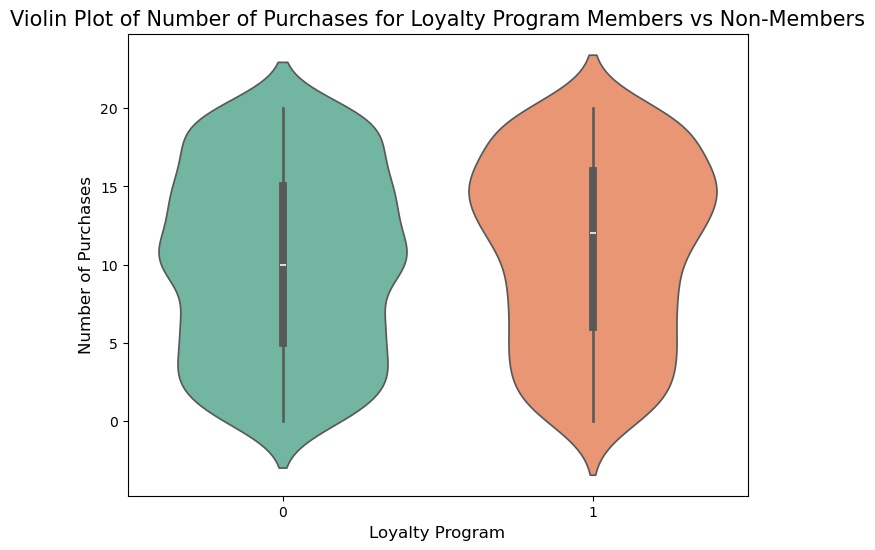

In [79]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='LoyaltyProgram', y='NumberOfPurchases', hue='LoyaltyProgram', data=data, palette='Set2',legend=False)


plt.title('Violin Plot of Number of Purchases for Loyalty Program Members vs Non-Members', fontsize=15)
plt.xlabel('Loyalty Program', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)


plt.show()

###  What is the distribution of NumberOfPurchases across customers with and without loyalty program membership?

In [86]:
purchase_distribution = data.groupby('LoyaltyProgram')['NumberOfPurchases'].describe()
print(f"Purchase distribution for customers with and without loyalty program:\n{purchase_distribution}")

Purchase distribution for customers with and without loyalty program:
                 count       mean       std  min  25%   50%   75%   max
LoyaltyProgram                                                         
0               1010.0  10.193069  5.881667  0.0  5.0  10.0  15.0  20.0
1                490.0  10.887755  5.877555  0.0  6.0  12.0  16.0  20.0


## Do loyalty program members purchase more frequently?

In [175]:
avg_purchases_by_loyalty = data.groupby('LoyaltyProgram')['NumberOfPurchases'].mean()
print(avg_purchases_by_loyalty)

LoyaltyProgram
0    10.193069
1    10.887755
Name: NumberOfPurchases, dtype: float64


C:\Users\91929\AppData\Local\Temp\ipykernel_19900\455576304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LoyaltyProgram', y='NumberOfPurchases', data=data, palette='seismic')


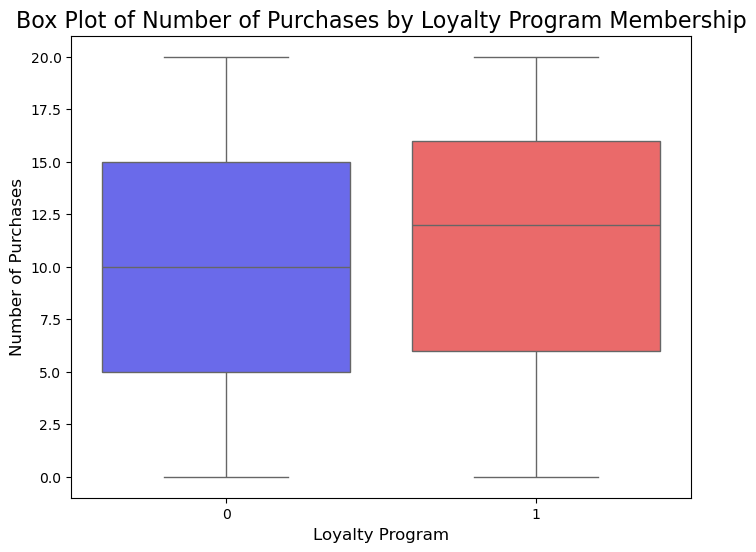

In [180]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='LoyaltyProgram', y='NumberOfPurchases', data=data, palette='seismic')


plt.title('Box Plot of Number of Purchases by Loyalty Program Membership', fontsize=16)
plt.xlabel('Loyalty Program', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)


plt.show()

##What is the maximum number of purchases made by a customer?

In [105]:
max_purchases = np.max(data['NumberOfPurchases'])
print(f"Maximum number of purchases made by a customer: {max_purchases}")

Maximum number of purchases made by a customer: 20


## How many customers availed discounts?

In [111]:
customers_with_discounts = np.sum(data['DiscountsAvailed'] > 0)
print(f"Number of customers who availed discounts: {customers_with_discounts}")

Number of customers who availed discounts: 1260


## What is the median annual income of customers?




In [114]:
median_income = np.median(data['AnnualIncome'])
print(f"Median annual income: {median_income}")

Median annual income: 83699.58147641507


## How many male and female customers are there?

In [117]:
gender_counts = data['Gender'].value_counts()
print(f"Gender distribution:\n{gender_counts}")

Gender distribution:
Gender
1    757
0    743
Name: count, dtype: int64


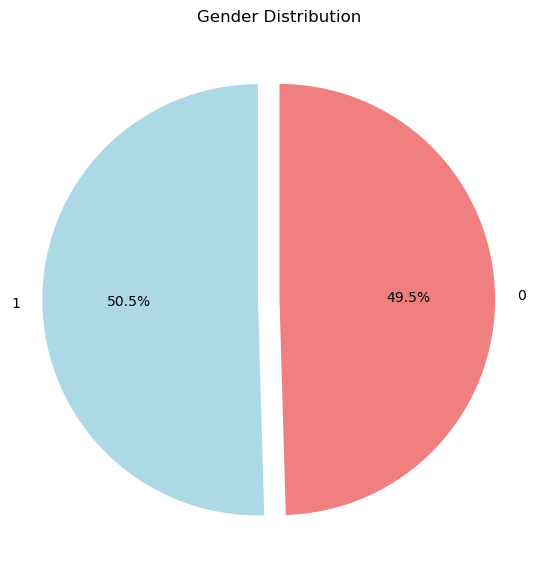

In [123]:
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90, explode=(0.1, 0)) 
plt.title('Gender Distribution')
plt.show()

### Do customers who spend more time on the website tend to avail more discounts?

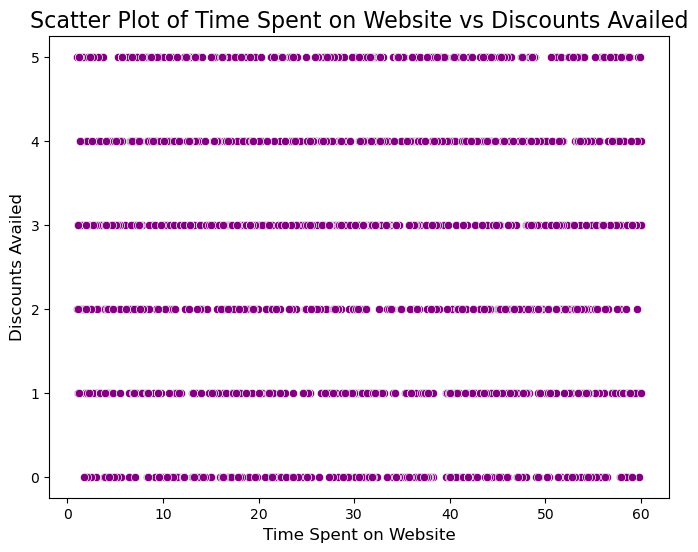

In [128]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TimeSpentOnWebsite', y='DiscountsAvailed', data=data, color='purple')

# Add title and labels
plt.title('Scatter Plot of Time Spent on Website vs Discounts Availed', fontsize=16)
plt.xlabel('Time Spent on Website', fontsize=12)
plt.ylabel('Discounts Availed', fontsize=12)

# Show the plot
plt.show()

In [132]:
average_time_spent = data['TimeSpentOnWebsite'].mean()

# Print the result
print(f"The average time spent on the website by customers is: {average_time_spent:.2f} units of time")

The average time spent on the website by customers is: 30.47 units of time


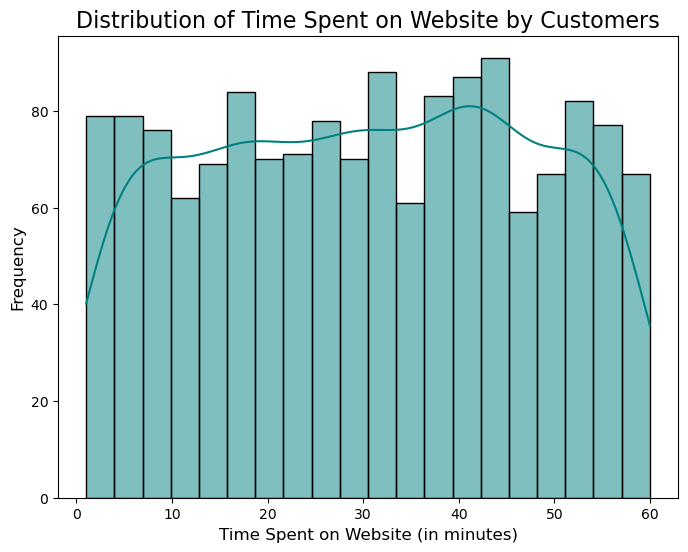

In [142]:
plt.figure(figsize=(8, 6))
sns.histplot(data['TimeSpentOnWebsite'], bins=20, kde=True, color='teal')

# Add title and labels
plt.title('Distribution of Time Spent on Website by Customers', fontsize=16)
plt.xlabel('Time Spent on Website (in minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

## What is the distribution of purchases across different product categories?

In [146]:
category_counts = data['ProductCategory'].value_counts()
category_counts 

ProductCategory
1    331
4    321
0    289
3    286
2    273
Name: count, dtype: int64

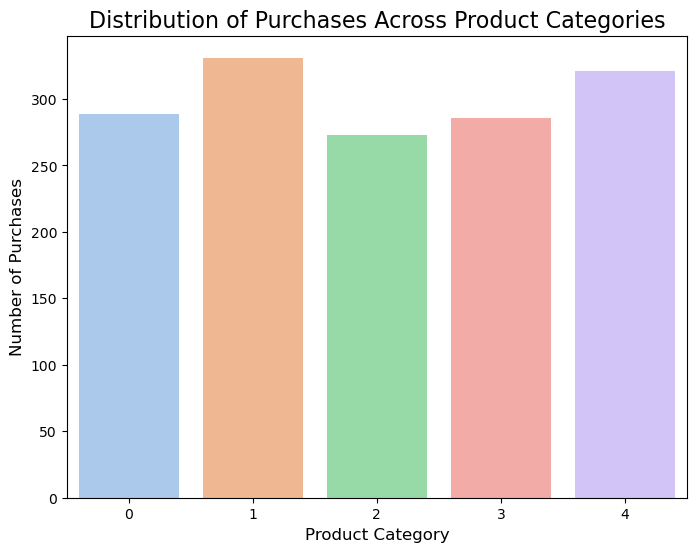

In [161]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ProductCategory',hue='ProductCategory', data=data, palette='pastel',legend=False)

# Add title and labels
plt.title('Distribution of Purchases Across Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)

# Show the plot
plt.show()

In [182]:
# Selecting only numerical columns
numerical_cols = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 
                  'DiscountsAvailed', 'LoyaltyProgram']  

correlation_matrix = data[numerical_cols].corr()

print(correlation_matrix)

                         Age  AnnualIncome  NumberOfPurchases  \
Age                 1.000000      0.016438          -0.038778   
AnnualIncome        0.016438      1.000000           0.000276   
NumberOfPurchases  -0.038778      0.000276           1.000000   
TimeSpentOnWebsite  0.032309     -0.001505           0.024644   
DiscountsAvailed    0.004009      0.016393           0.029581   
LoyaltyProgram     -0.005980     -0.045296           0.055358   

                    TimeSpentOnWebsite  DiscountsAvailed  LoyaltyProgram  
Age                           0.032309          0.004009       -0.005980  
AnnualIncome                 -0.001505          0.016393       -0.045296  
NumberOfPurchases             0.024644          0.029581        0.055358  
TimeSpentOnWebsite            1.000000          0.001240        0.005965  
DiscountsAvailed              0.001240          1.000000       -0.048462  
LoyaltyProgram                0.005965         -0.048462        1.000000  


In [184]:
# To  Extract the correlation with 'NumberOfPurchases'
correlation_with_purchases = correlation_matrix['NumberOfPurchases'].sort_values(ascending=False)

print(correlation_with_purchases)


NumberOfPurchases     1.000000
LoyaltyProgram        0.055358
DiscountsAvailed      0.029581
TimeSpentOnWebsite    0.024644
AnnualIncome          0.000276
Age                  -0.038778
Name: NumberOfPurchases, dtype: float64


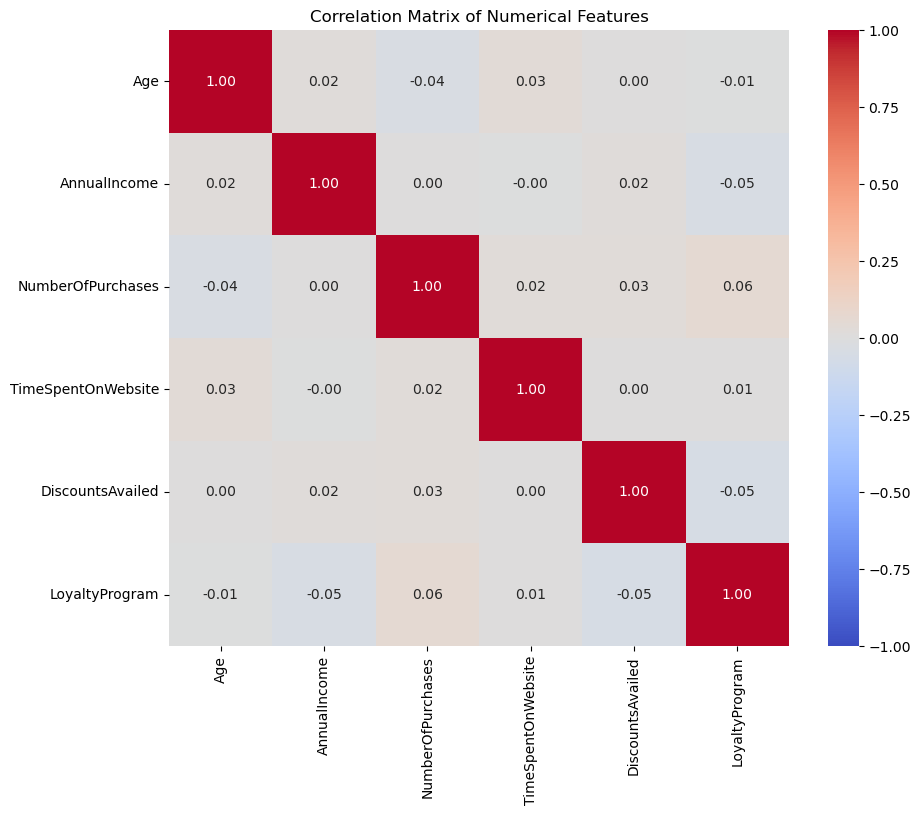

In [186]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Matrix of Numerical Features')

plt.show()